
## Understanding the difference between different kernels in SVM models

#### Yevgeniy Samarkin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Lei Liu, Graduate Student, The University of Texas at Austin


### Executive Summary

This project involves a comparison of Support Vector Machines with different kernel functions. The problem chosen for demonstrating the concept is the classification of data. The three kernel functions compared in this workflow are "linear," "sigmoid," and "radial basis function (rbf)." In this workflow, Support Vector Classifier (SVC) models with the three mentioned kernel functions are applied to two datasets. The first dataset involves three classes that can be separated by a line. The hypothesis is that for such a dataset, the performance of the three kernel functions will be identical since the problem is simple. However, the classes in the second dataset can't be separated by a line, and hence, it is expected that some of the SVC models will fail to correctly identify the classes.

### Background information about support vector machines and kernels
#### Support Vector Classifier models (SVC)
Support vector classifier algorithm is a non - parametric model that is used to identify a **hyperplane** (decision boundary) within an N-dimensional space (where N represents the number of features) that effectively separates the data points into distinct classes. To distinguish between the two classes of data points, numerous potential hyperplanes are available for selection. The goal of the algorithm is to discover a plane that  maximizes the **margin** (distance) between hyperplane and **support vectors** (closest data points to the hyperplane). Maximizing this margin distance adds robustness, enhancing the confidence in classifying future data points. 
#### Kernel functions
Sometimes, data may not be linearly separable in a lower-dimensional space, such as 2D. In such cases, support vector machine algorithms utilize diverse kernel functions. These kernels, essentially mathematical techniques, transform input data into the necessary format for processing. Within support vector machines, these kernels serve to map the data, introducing an additional dimension. This transformation allows for the linear separation of data by a hyperplane in a higher-dimensional space. This technique of tranforming the data into the higher dimensional space is called a "kernel trick". Essentialy the kernel function itself is a method for calculating the dot product between two vectors, $x_1$ and $x_2$, within a feature space that could be highly dimensional. This is why kernel functions are frequently referred to as a "generalized dot product."
#### Kernel functions studied in this project
In this project, three kernels are compared:
* Linear kernel
\begin{equation}
k(x, x') = <x,x'>
\end{equation}
* Sigmoid kernel
\begin{equation}
k(x, x') = tanh(\gamma<x,x'>+r)
\end{equation}
* Radial Basis Function (RBF) kernel
\begin{equation}
k(x, x') = exp(-\gamma||x-x'||^2+r)
\end{equation}
  

### Import Packages

In [1]:
# Importing general libraries and functions for SVM model
import numpy as np                                        # for working with data and model arrays                                        
from sklearn import svm                                   # importing the SVM module
from sklearn.inspection import DecisionBoundaryDisplay    # function for decisions boundary visualization 
                                                          # (requires scikit-learn version of 1.3.2.)
from sklearn.metrics import confusion_matrix              # function used to demonstrate the confusion matrix
from sklearn import cluster, datasets, mixture            # import modlues that are used in data generation
import seaborn as sns                                     # for using heatmaps

# Supress warnings
import warnings
warnings.filterwarnings('ignore')                         # ignoring the warning messages

# Kernels
from sklearn.metrics.pairwise import linear_kernel        # importing linear kernel
from sklearn.metrics.pairwise import rbf_kernel           # importing rbf kernel
from sklearn.metrics.pairwise import sigmoid_kernel       # importing sigmoid kernel

# Plotting
import matplotlib.pyplot as plt                           # library for plotting
from mpl_toolkits import mplot3d                          # for 3D plots generation
from mpl_toolkits.mplot3d.axes3d import Axes3D
                         

# User interface functions
from ipywidgets import Button, Layout                     # to create buttons and layouts for interactive plot
import ipywidgets as widgets                              # import different widgets for interactive plot
from IPython.display import display                       # display the interactive plot

### Functions for the demonstration of decision boundaries and confusion matrices

The following functions will be used in the workflow.

In [2]:
### The functions were taken and modified from the following source: 
### https://github.com/jakkcoder/SVM-kernel-trick/blob/master/SVM_Tutorial.ipynb

def make_meshgrid(x,y, h = .02):                        # Mesh generation
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, model, xx, yy,**params):          # Plotting the contour line (decision boundary)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_decision_boundary(X,y):                        # The main function that fits the models with different kernels
    kernels = ['linear', 'sigmoid', 'rbf']
    lin = kernels[0]
    sigm = kernels[1]
    rbf = kernels[2]
    for ker in kernels:
      model = svm.SVC(kernel = ker)
      if ker == 'linear':
        clf_lin = model.fit(X,y)
        ypred_lin = clf_lin.predict(X)
        cm_lin = confusion_matrix(y, ypred_lin, labels=clf_lin.classes_)
      elif ker == 'sigmoid':
        clf_sigm = model.fit(X,y)
        ypred_sigm = clf_sigm.predict(X)
        cm_sigm = confusion_matrix(y, ypred_sigm, labels=clf_sigm.classes_)
      elif ker == 'rbf':
        clf_rbf = model.fit(X,y)
        ypred_rbf = clf_rbf.predict(X)
        cm_rbf = confusion_matrix(y, ypred_rbf, labels=clf_rbf.classes_)

    # Set-up grid for plotting
    X0, X1 = X[:,0],X[:,1]
    xx, yy = make_meshgrid(X0,X1)

    # Figure 1 (decision boundaries)
    fig = plt.figure(figsize=plt.figaspect(1))
    fig.dpi = 120
    
    ax = fig.add_subplot(221)
    ax.scatter(X0, X1, c = y, cmap = plt.cm.Spectral, s = 20, edgecolors = 'k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title('Actual solution')
    
    ax = fig.add_subplot(222)
    plot_contours(ax, clf_lin, xx, yy, cmap = plt.cm.Spectral, alpha = 0.8)
    ax.scatter(X0, X1, c = ypred_lin, cmap = plt.cm.Spectral, s = 20, edgecolors = 'k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title('LINEAR kernel')
    fig.figsize=plt.figaspect(0.5)

    ax = fig.add_subplot(223)
    plot_contours(ax, clf_sigm, xx, yy, cmap = plt.cm.Spectral, alpha = 0.8)
    ax.scatter(X0, X1, c = ypred_sigm, cmap = plt.cm.Spectral, s = 20, edgecolors = 'k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title('SIGMOID kernel')
    
    ax = fig.add_subplot(224)
    plot_contours(ax, clf_rbf, xx, yy, cmap = plt.cm.Spectral, alpha = 0.8)
    ax.scatter(X0, X1, c = ypred_rbf, cmap = plt.cm.Spectral, s = 20, edgecolors = 'k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title('RBF kernel')

    plt.show()
    
    # Figure 2 (confusion matrices)
    fig = plt.figure(figsize=plt.figaspect(0.5))
    fig.dpi = 90
    
    ax = fig.add_subplot(131)
    sns.heatmap(cm_lin, annot=True, fmt='g',cmap="viridis",square = True, cbar = False); 
    ax.set_title('Linear'); 
    ax.set_xticks(())
    ax.set_yticks(())
    
    ax = fig.add_subplot(132)
    sns.heatmap(cm_sigm, annot=True, fmt='g',cmap="viridis",square = True, cbar = False); 
    ax.set_title('Sigmoid'); 
    ax.set_xticks(())
    ax.set_yticks(())
    
    ax = fig.add_subplot(133)
    sns.heatmap(cm_rbf, annot=True, fmt='g',cmap="viridis",square = True, cbar = False); 
    ax.set_title('RBF'); 
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()

### Functions for interactive plot
The following cell contains the code that defines some functions for the interactive plot with user interface

In [3]:
# Buttons for the interactive plot & the corresponding plots
# Inspired by the interactive workflows of Prof. Michael Pyrcz (https://github.com/GeostatsGuy/InteractivePython)

def button1(arg):
    plt.clf()
    n_samples = 500
    seed = 50
    noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
    )

    X, y2 = noisy_circles
    ker1 = linear_kernel(X2)
    
    x = X2[:,0]
    y = X2[:,1]
    z = ker1[1]
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Kernel values')
    ax.scatter(x, y, z,c = y2)
    ax.view_init(20, 40)
    ax.set_title("Linear kernel")
    
def button2(arg):
    plt.clf()
    n_samples = 500
    seed = 50
    noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
    )

    X2, y2 = noisy_circles
    ker1 = sigmoid_kernel(X2)
    
    x = X2[:,0]
    y = X2[:,1]
    z = ker1[1]
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Kernel values')
    ax.scatter(x, y, z,c = y2)
    ax.view_init(20, 40)
    ax.set_title("Sigmoid kernel")
    
def button3(arg):
    plt.clf()
    n_samples = 500
    seed = 50
    noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
    )

    X2, y2 = noisy_circles
    ker1 = rbf_kernel(X2)
    
    x = X2[:,0]
    y = X2[:,1]
    z = ker1[1]
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Kernel values')
    ax.scatter(x, y, z,c = y2)
    ax.view_init(20, 40)
    ax.set_title("RBF kernel")

### Data utilized in the workflow

The workflow involves demonstrating the classification of two datasets using three SVM models with the mentioned kernel functions. Each visualization of the solution includes plotting the decision boundary and demonstrating the confusion matrix as an indicator of the quality of classification. The datasets were generated using the scikit-learn library (https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html). One of the datasets, named blobs,represents a case with linearly separable data in 2D space, whereas the second dataset, named noisy circles, represents two classes that can't be separated linearly without performing a kernel trick.

### Generating linearly separable dataset (Dataset 1)

In [4]:
# Generation of the "blobs" dataset using scikit-learn library:
n_samples = 300
seed = 50
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)

X1, y1 = blobs

#### Plot the data to visualize the classes:

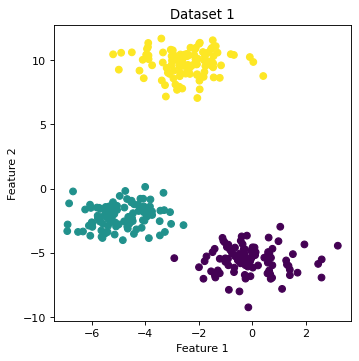

In [5]:
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot()
plt.scatter(X1[:,0],X1[:,1],c = y1)
ax.set_title('Dataset 1'); 
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
fig.dpi = 80

### Generating linearly non - separable dataset (Dataset 2)

In [6]:
# Generation of the "noisy circles" dataset using scikit-learn library:
n_samples = 500
seed = 50
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)

X2, y2 = noisy_circles

#### Plot the data to visualize the classes:

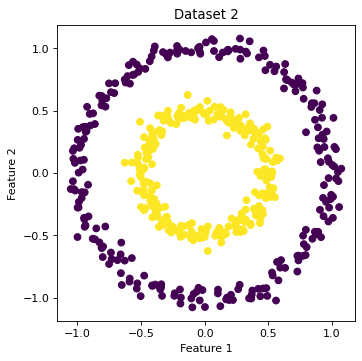

In [7]:
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot()
plt.scatter(X2[:,0],X2[:,1],c = y2)
ax.set_title('Dataset 2'); 
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
fig.dpi = 80

### Comparison of Linear, Sigmoid and RBF kernels
Here, we begin testing SVM models with three kernels of interest on the generated datasets. The hypothesis is that all models will perform equally well on the linearly separable dataset. However, the expectation is that some SVM models may fail to classify the data in the second dataset.

### 1. Testing of the SVM models on the first dataset

Plot the resultant decision boundary and observe the confusion matrices:




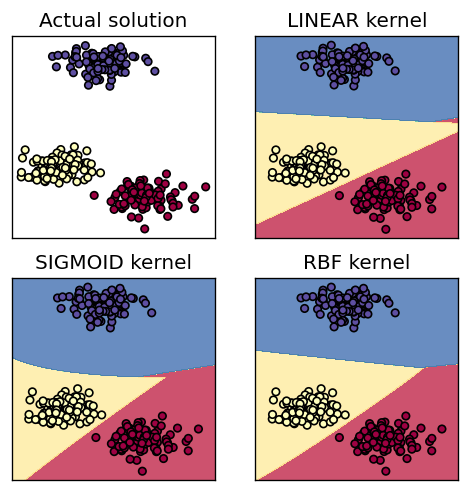

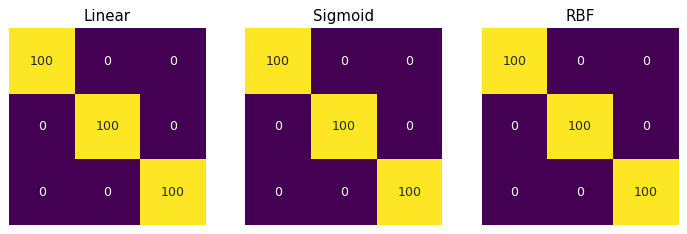

In [8]:
plot_decision_boundary(X1,y1)

#### Summary:
As can be observed from the figures above, all three kernels easily handled the first task. All three SVM models drew reasonable decision boundaries, resulting in a perfect separation of the three classes.

### 2. Testing of the SVM models on the second dataset

Plot the resultant decision boundary and observe the confusion matrices:

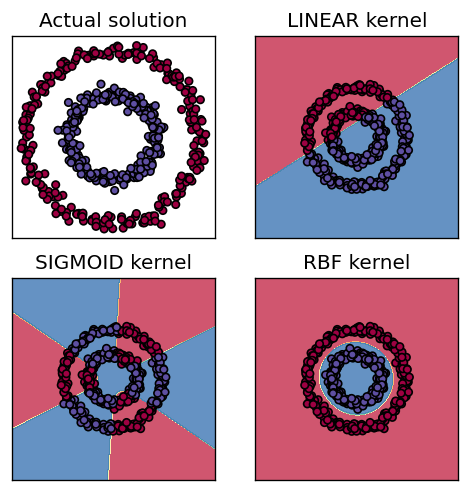

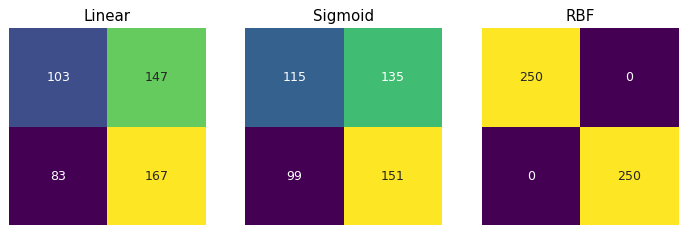

In [9]:
plot_decision_boundary(X2,y2)

#### Summary:
As can be observed, in the case of the more complicated dataset in which classes can't be separated linearly in a 2D space, SVM models with linear and sigmoid kernels fail to correctly draw a decision boundary. However, the SVM model with a radial basis function kernel can easily handle the problem. The next few cells are dedicated to the explanation of why this happened.

### 3. Visualization of the kernel tricks
The next cell demonstrates how the kernel function adds an extra dimension which helps to linearly separate the data that was not linearly - separable in a lower dimensional space.

**Note:** *do not change the number of data points (controlled by the **n_samples** parameter) generated for the second dataset. Selecting a different number of samples may lead to more complex outputs of the kernel function, possibly requiring additional dimensions for linearly separating the data. In that case the concept cannot be visualized.*
#### Calculate the kernels and produce 3D plots:

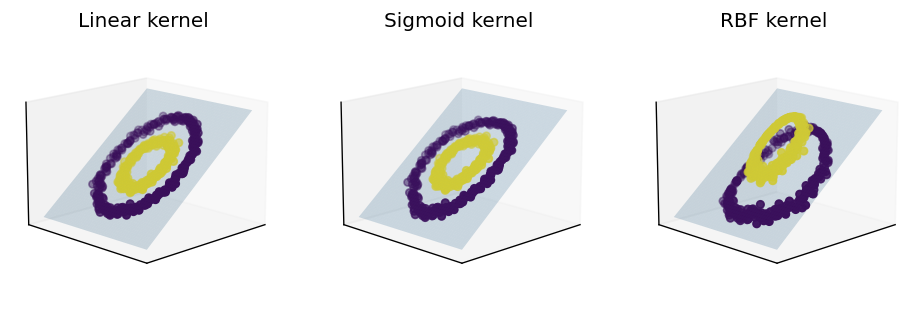

In [10]:
# Visualization of different kernel tricks
ker1 = linear_kernel(X2)
ker2 = sigmoid_kernel(X2)
ker3 = rbf_kernel(X2)

xx, yy = np.meshgrid(np.linspace(-1.5,1.5,100), np.linspace(-1.5,1.5,100))
zz = -0.28*xx+0.66
zz1 = -0.45*xx
zz2 = -0.1*xx+0.752

fig = plt.figure(figsize=plt.figaspect(0.5))
fig.dpi = 120
# First subplot
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter3D(X2[:,0], X2[:,1], ker1[1], c=y2)
ax.plot_surface(xx, yy, zz1, alpha=0.2)
ax.view_init(elev=15, azim=45)
ax.set_xticks(())
ax.set_yticks(())
ax.set_zticks(())
ax.set_title('Linear kernel')

# Second subplot
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter3D(X2[:,0], X2[:,1], ker2[1], c=y2)
ax.plot_surface(xx, yy, zz2, alpha=0.2)
ax.view_init(elev=15, azim=45)
ax.set_xticks(())
ax.set_yticks(())
ax.set_zticks(())
ax.set_title('Sigmoid kernel')

# Third subplot
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.2)
ax.scatter3D(X2[:,0], X2[:,1], ker3[1], c=y2)
ax.view_init(elev=15, azim=45)
ax.set_xticks(())
ax.set_yticks(())
ax.set_zticks(())
ax.set_title('RBF kernel')
plt.show()

#### Summary:
As can be noticed, the linear kernel trick does not provide any advantage, and the data in 3D space still lies in the same plane. In the case of the sigmoid kernel, the data gains some concavity; however, it is still not possible to draw a hyperplane that perfectly separates the classes. Only in the case of the radial basis function does the third dimension add some distance between two classes, allowing the fitting of a hyperplane that perfectly separates the datapoints into two classes.
### 4. Interactive plot
The interactive plot presented in the next cell visualizes three kernel tricks in a 3D space. It allows a user to rotate the data and better understand how the hyperplane can be fitted in three different cases.

#### Run the code and use the buttons to change the kernel:
**Note:** *The default state of the visualization plot is a linear kernel. You can use the mouse to rotate the 3D plot for better understanding.*

<IPython.core.display.Javascript object>


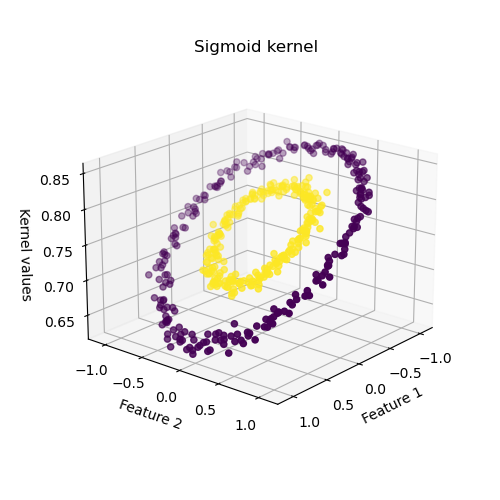

In [11]:
# Code was taken and modified: 
# https://stackoverflow.com/questions/42998009/clear-matplotlib-figure-in-jupyter-python-notebook

%matplotlib notebook
# generate test data
n_samples = 500
seed = 50
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)

X2, y2 = noisy_circles
ker1 = linear_kernel(X2)
x = X2[:,0]
y = X2[:,1]
z = ker1[1]

# prepare widgets
l = widgets.Text(value='                              𝐃𝐞𝐦𝐨𝐧𝐬𝐭𝐫𝐚𝐭𝐢𝐨𝐧 𝐨𝐟 𝐭𝐡𝐞 "𝐤𝐞𝐫𝐧𝐞𝐥 𝐭𝐫𝐢𝐜𝐤" 𝐜𝐨𝐧𝐜𝐞𝐩𝐭',
                 layout=Layout(width='500px', height='35px'))
b1 = widgets.Button(description='𝐋𝐢𝐧𝐞𝐚𝐫 𝐤𝐞𝐫𝐧𝐞𝐥',
                    layout=Layout(width='16.7%', height='50px',description = 'b1'),
                    style=dict(text_color='white'))
b1.style.button_color = '#ff7e05'
b1.on_click(button1)
b2 = widgets.Button(description='𝐒𝐢𝐠𝐦𝐨𝐢𝐝 𝐤𝐞𝐫𝐧𝐞𝐥',
           layout=Layout(width='16.7%', height='50px',description = 'b2'),
                   style=dict(text_color='white'))
b2.style.button_color = '#ff7e05'
b2.on_click(button2)
b3 = widgets.Button(description='𝐑𝐁𝐅 𝐤𝐞𝐫𝐧𝐞𝐥',
           layout=Layout(width='16.7%', height='50px',description = 'b3'),
                   style=dict(text_color='white'))
b3.style.button_color = '#ff7e05'
b3.on_click(button3)
ui = widgets.HBox([b1,b2,b3],)
ui2 = widgets.VBox([l,ui],)
display(ui2)

fig = plt.figure('Resultant figure',figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Kernel values')
ax.scatter(x, y, z,c = y2)
ax.view_init(20, 40)
ax.set_title("Linear kernel")
# show plot
plt.show()  

### 5. Conclusive summary:
As demonstrated by the workflow, sometimes using a linear kernel function in the SVM model is sufficient to solve an easy classification problem; however, certain datasets may necessitate the utilization of more complex functions. Essentially, the kernel function is a hyperparameter in the SVM model that can be adjusted or selected based on the complexity of the utilized data. The kernel helps to map the data into higher-dimensional space, allowing the use of a linear hyperplane to separate the data points and assign them to classes. In cases where the data is complex, it becomes necessary to employ more sophisticated kernel functions to achieve better classification results. 


I hope this was helpful,

*Yevgeniy Samarkin, PhD student*

*Email:* yevgeniysamarkin@gmail.com, ys25756@my.utexas.edu
#### [LinkedIn](https://www.linkedin.com/in/yevgeniy-samarkin-800007126/) | [Google Scholar](https://scholar.google.com/citations?user=WPCp3IEAAAAJ&hl=eny) | [ResearchGate](https://www.researchgate.net/profile/Yevgeniy-Samarkin-2) 

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
